In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
import sys, os
sys.path.append(sys.path.append('/content/drive/My Drive/CURIS/VeriX/'))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Normally trained vs Adversarially trained models

In [4]:
output_path = 'drive/MyDrive/CURIS/VeriX/outputs/'

In [5]:
# for filename in os.listdir(networks_path):
#     if filename.startswith('mnist') and filename.endswith('.h5'):
#         onnx_path = networks_path + filename[:-3] + '.onnx'
#         if not os.path.exists(onnx_path):
#             continue
#         keras_model_path = networks_path + filename
#         keras_models.append(keras_model_path)
#         model_names.append(filename[:-3])

normal_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set'])
for i in range(100):
  folder_path = output_path + f'index-{i}-mnist-10x2-normal-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-normal-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      normal_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set]
      print(f'\rloaded index {i} results', end='')
  else:
    break

loaded index 56 results

In [6]:
adv_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set'])
for i in range(100):
  folder_path = output_path + f'index-{i}-mnist-10x2-pgd-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-pgd-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      adv_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set]
      print(f'\rloaded index {i} results', end='')
  else:
    break

loaded index 56 results

In [7]:
normal_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set
0,0,210,0,574,"[662, 553, 277, 33, 232, 687, 465, 481, 432, 5...",[],"[530, 338, 336, 366, 773, 308, 253, 734, 310, ..."
1,1,290,0,494,"[704, 683, 134, 154, 629, 632, 554, 152, 354, ...",[],"[418, 446, 475, 531, 503, 474, 447, 697, 558, ..."
2,2,216,1,567,"[490, 535, 283, 328, 31, 572, 407, 773, 111, 2...",[51],"[114, 253, 250, 586, 558, 278, 335, 530, 708, ..."
3,3,65,0,719,"[352, 75, 322, 66, 380, 298, 441, 507, 629, 62...",[],"[647, 614, 44, 40, 444, 565, 39, 165, 561, 416..."
4,4,226,0,558,"[257, 236, 736, 231, 627, 438, 214, 246, 289, ...",[],"[396, 135, 397, 423, 422, 732, 172, 703, 774, ..."
5,5,156,1,627,"[504, 410, 430, 341, 612, 298, 770, 394, 310, ...",[40],"[559, 142, 71, 114, 621, 228, 117, 531, 278, 6..."
6,6,316,0,468,"[46, 546, 118, 107, 156, 581, 269, 155, 689, 4...",[],"[172, 396, 478, 677, 506, 422, 535, 397, 705, ..."
7,7,138,0,646,"[437, 335, 364, 765, 12, 362, 760, 541, 351, 7...",[],"[368, 705, 360, 249, 358, 330, 359, 734, 446, ..."
8,8,553,0,231,"[72, 723, 647, 74, 186, 209, 105, 106, 304, 21...",[],"[46, 48, 47, 66, 67, 38, 63, 35, 50, 64, 49, 6..."
9,9,215,0,569,"[719, 379, 516, 32, 369, 779, 205, 463, 231, 1...",[],"[418, 446, 705, 474, 734, 742, 733, 171, 706, ..."


In [8]:
adv_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set
0,0,0,0,784,[],[],"[434, 490, 462, 489, 461, 517, 659, 406, 435, ..."
1,1,277,0,507,"[537, 654, 591, 474, 549, 499, 722, 710, 636, ...",[],"[675, 530, 376, 403, 181, 171, 117, 348, 306, ..."
2,2,0,0,784,[],[],"[65, 259, 287, 315, 260, 316, 264, 265, 237, 2..."
3,3,0,0,784,[],[],"[51, 777, 538, 591, 421, 566, 673, 668, 247, 3..."
4,4,51,0,733,"[100, 533, 492, 126, 58, 573, 464, 774, 93, 26...",[],"[403, 375, 429, 376, 430, 402, 432, 401, 404, ..."
5,5,0,0,784,[],[],"[212, 568, 569, 65, 106, 567, 249, 557, 570, 7..."
6,6,0,0,784,[],[],"[428, 455, 194, 427, 462, 456, 429, 454, 735, ..."
7,7,61,0,723,"[594, 190, 447, 417, 498, 257, 389, 249, 560, ...",[],"[328, 370, 369, 211, 371, 342, 343, 355, 733, ..."
8,8,0,0,784,[],[],"[542, 97, 122, 98, 541, 386, 96, 95, 107, 345,..."
9,9,70,0,714,"[591, 783, 275, 251, 362, 559, 158, 175, 589, ...",[],"[572, 733, 351, 69, 48, 544, 352, 42, 763, 2, ..."


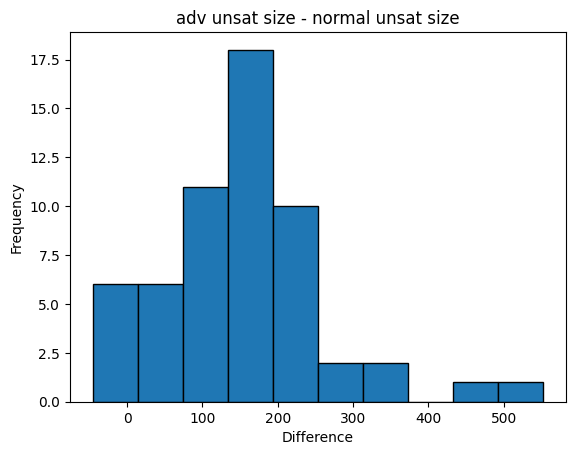

In [9]:
# difference between explanation sizes
differences = adv_results['unsat_size'] - normal_results['unsat_size']
plt.hist(differences, bins=10, edgecolor='black')
plt.title("adv unsat size - normal unsat size")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

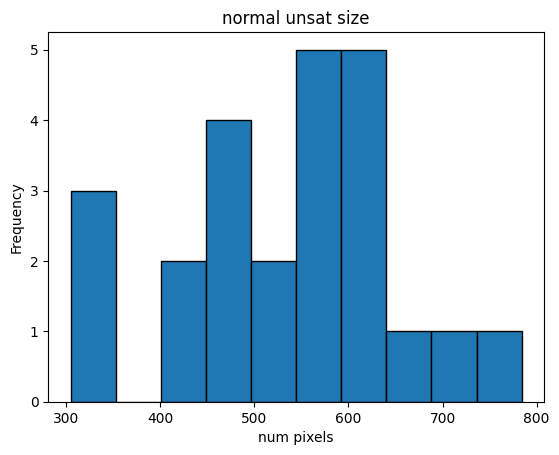

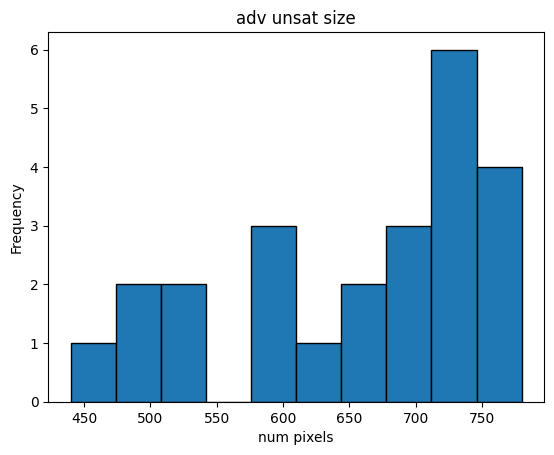

In [10]:
# unsat set sizes for samples with explanations generated on adv model only
plt.hist(normal_results[adv_results['sat_size'] != 0]['unsat_size'], bins=10, edgecolor='black')
plt.title("normal unsat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(adv_results[adv_results['sat_size'] != 0]['unsat_size'], bins=10, edgecolor='black')
plt.title("adv unsat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()


In [11]:
sum(differences < 0)

4

###Incorrect predictions

In [12]:
incorrect_outputs_path = 'drive/MyDrive/CURIS/VeriX/outputs/incorrect-preds/'

In [34]:
normal_incorrect_indices = np.loadtxt(incorrect_outputs_path + 'mnist-10x2-normal-incorrect-indices.txt', dtype='int')
adv_incorrect_indices = np.loadtxt(incorrect_outputs_path + 'mnist-10x2-pgd-incorrect-indices.txt', dtype='int')

In [19]:
normal_incorrect_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set', 'logits'])
for i in normal_incorrect_indices[:100]:
  folder_path = incorrect_outputs_path + f'index-{i}-mnist-10x2-normal-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-normal-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      logits = np.loadtxt(folder_path + f'index-{i}-logits.txt', dtype='float', ndmin=1)
      normal_incorrect_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set, logits]
      print(f'\rloaded index {i} results', end='')

loaded index 1326 results

In [30]:
adv_incorrect_results = pd.DataFrame(columns=['index', 'sat_size', 'timeout_size', 'unsat_size', 'sat_set', 'timeout_set', 'unsat_set', 'logits'])
for i in adv_incorrect_indices[:100]:
  folder_path = incorrect_outputs_path + f'index-{i}-mnist-10x2-pgd-60s-heuristic-linf0.05/'
  if os.path.exists(folder_path):
    prefix = f'index-{i}-mnist-10x2-pgd-linf0.05'
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      sat_set = np.loadtxt(folder_path + prefix + '-sat.txt', dtype='int', ndmin=1)
      timeout_set = np.loadtxt(folder_path + prefix + '-timeout.txt', dtype='int', ndmin=1)
      unsat_set = np.loadtxt(folder_path + prefix + '-unsat.txt', dtype='int', ndmin=1)
      logits = np.loadtxt(folder_path + f'index-{i}-logits.txt', dtype='float', ndmin=1)
      adv_incorrect_results.loc[i] = [i, len(sat_set), len(timeout_set), len(unsat_set), sat_set, timeout_set, unsat_set, logits]
      print(f'\rloaded index {i} results', end='')

loaded index 1192 results

In [21]:
normal_incorrect_results

,index,sat_size,timeout_size,unsat_size,sat_set,timeout_set,unsat_set,logits
8,8,553,0,231,"[72, 723, 647, 74, 186, 209, 105, 106, 304, 21...",[],"[46, 48, 47, 66, 67, 38, 63, 35, 50, 64, 49, 6...","[-6.784434, -9.800146, 0.5326139, -4.886688, -..."
15,15,470,0,314,"[71, 421, 647, 138, 278, 741, 675, 305, 642, 5...",[],"[670, 96, 197, 362, 590, 171, 474, 114, 92, 89...","[-8.282979, -0.68774086, -2.349415, 6.3140554,..."
18,18,459,0,325,"[612, 211, 571, 315, 176, 440, 497, 527, 439, ...",[],"[276, 248, 249, 277, 304, 107, 703, 247, 667, ...","[-3.2087898, -2.2324002, -0.40499315, 1.513159..."
33,33,232,0,552,"[764, 662, 215, 355, 181, 465, 511, 439, 768, ...",[],"[46, 67, 66, 48, 47, 38, 68, 50, 35, 64, 63, 4...","[3.836849, -16.161097, -1.5526398, -8.477587, ..."
66,66,592,0,192,"[39, 45, 47, 223, 48, 224, 135, 49, 392, 63, 3...",[],"[334, 306, 642, 248, 276, 136, 277, 305, 304, ...","[-3.5667493, -6.467092, -1.1571989, 0.16986895..."
...,...,...,...,...,...,...,...,...
1289,1289,587,0,197,"[338, 308, 336, 366, 530, 282, 310, 254, 448, ...",[],"[705, 368, 734, 446, 360, 418, 742, 733, 358, ...","[-2.742493, -4.54588, -4.3673873, -3.091237, -..."
1299,1299,357,0,427,"[468, 546, 660, 595, 718, 602, 637, 767, 155, ...",[],"[590, 474, 418, 390, 558, 197, 391, 557, 446, ...","[-0.29514468, -9.04459, -2.1908567, 4.9383655,..."
1315,1315,382,0,402,"[263, 69, 604, 497, 117, 239, 661, 143, 608, 5...",[],"[334, 306, 670, 277, 642, 362, 193, 278, 249, ...","[-10.4893675, -0.9534101, -0.7794509, 4.865706..."
1319,1319,328,0,456,"[293, 599, 234, 158, 554, 189, 660, 8, 628, 29...",[],"[590, 96, 670, 144, 486, 171, 251, 485, 646, 1...","[-1.38836, -10.025025, -0.5854175, 2.0189893, ..."


In [16]:
# normal average explanation size
sum(normal_results['sat_size'])/len(normal_results['sat_size'])

207.859649122807

In [22]:
# normal average explanation size of incorrect predictions
sum(normal_incorrect_results['sat_size'])/len(normal_incorrect_results['sat_size'])

399.84

In [23]:
# adv average explanation size
sum(adv_results['sat_size'])/len(normal_results['sat_size'])

53.63157894736842

In [31]:
# adv average explanation size of incorrect predictions
sum(adv_incorrect_results['sat_size'])/len(normal_incorrect_results['sat_size'])

319.42

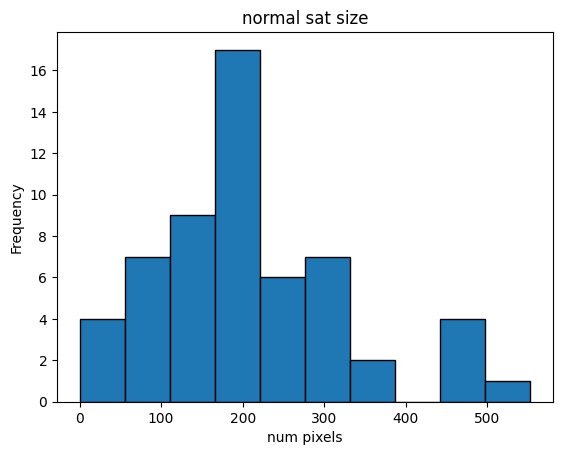

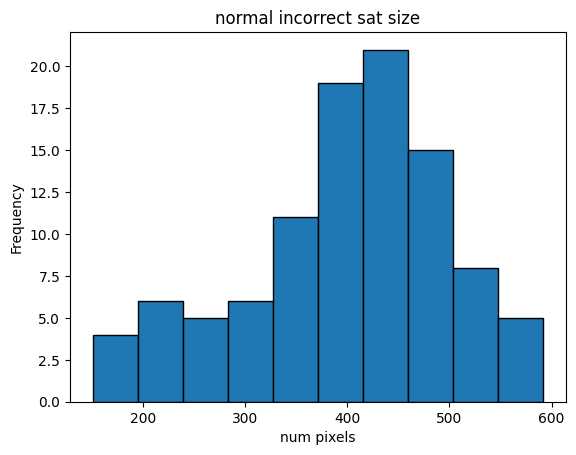

In [56]:
plt.hist(normal_results['sat_size'], bins=10, edgecolor='black')
plt.title("normal sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(normal_incorrect_results['sat_size'], bins=10, edgecolor='black')
plt.title("normal incorrect sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

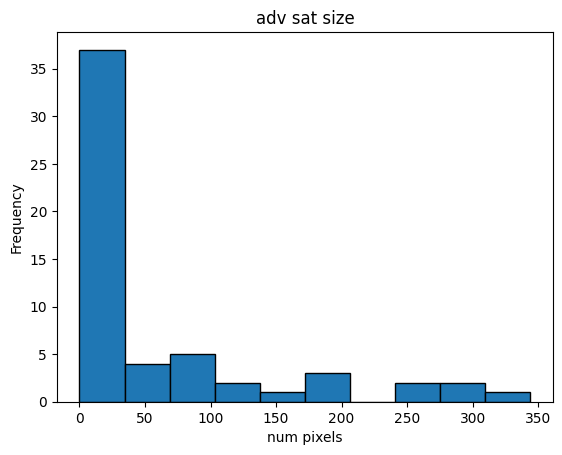

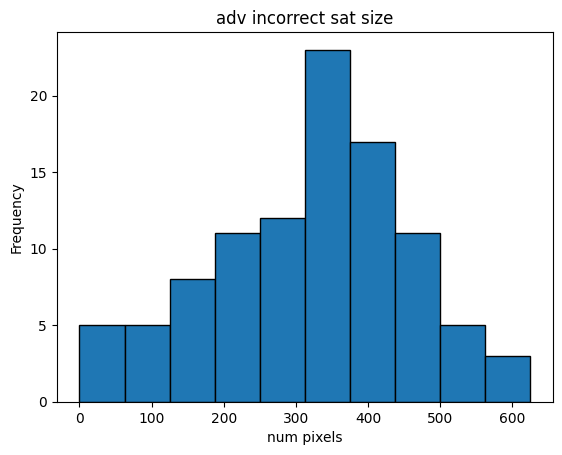

In [32]:
plt.hist(adv_results['sat_size'], bins=10, edgecolor='black')
plt.title("adv sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

plt.hist(adv_incorrect_results['sat_size'], bins=10, edgecolor='black')
plt.title("adv incorrect sat size")
plt.xlabel("num pixels")
plt.ylabel("Frequency")
plt.show()

#### only samples that both networks misclassified

In [51]:
both_incorrect_indices = np.intersect1d(adv_incorrect_indices[:100], normal_incorrect_indices[:100])

In [53]:
adv_both_incorrect = adv_incorrect_results[adv_incorrect_results['index'].isin(both_incorrect_indices)]
normal_both_incorrect = normal_incorrect_results[normal_incorrect_results['index'].isin(both_incorrect_indices)]

In [54]:
# normal average explanation size of incorrect predictions
sum(normal_both_incorrect['sat_size'])/len(normal_both_incorrect['sat_size'])

390.8524590163934

In [55]:
# adv average explanation size of incorrect predictions
sum(adv_both_incorrect['sat_size'])/len(adv_both_incorrect['sat_size'])

286.62295081967216